Algoritmos


In [9]:
import heapq


def heapsort_heapq(arr):
    heapq.heapify(arr)
    sorted_array = []
    while arr:
        sorted_array.append(heapq.heappop(arr))
    return sorted_array


In [10]:
class Queue:

    items = []

    def __init__(self):
        self.items = []

    def add(self, item: int) -> None:
        self.items.append(item)
        current_index = len(self.items) - 1
        parent = (current_index - 1) // 2
        if parent < 0:
            return
        while self.items[parent] < self.items[current_index]:
            self.items[parent], self.items[current_index] = (
                self.items[current_index],
                self.items[parent],
            )
            current_index = parent
            parent = (current_index - 1) // 2
            if current_index == 0 or parent < 0:
                break

    def remove(self) -> int:
        if self.size() == 0:
            raise Exception("Queue is empty")
        if self.size() == 1:
            return self.items.pop()
        current_root = self.items[0]
        last = self.items.pop()
        self.items[0] = last
        index = 0
        array_len = len(self.items)
        while index < array_len:
            left = 2 * index + 1
            right = 2 * index + 2

            if left < array_len and right < array_len:
                if (
                    self.items[left] >= self.items[right]
                    and self.items[left] >= self.items[index]
                ):
                    self.items[left], self.items[index] = (
                        self.items[index],
                        self.items[left],
                    )
                    index = left
                elif (
                    self.items[right] > self.items[left]
                    and self.items[right] > self.items[index]
                ):
                    self.items[right], self.items[index] = (
                        self.items[index],
                        self.items[right],
                    )
                    index = right
                else:
                    break
            elif left < array_len and self.items[left] >= self.items[index]:
                self.items[left], self.items[index] = (
                    self.items[index],
                    self.items[left],
                )
                index = left
            elif right < array_len and self.items[right] > self.items[index]:
                self.items[right], self.items[index] = (
                    self.items[index],
                    self.items[right],
                )
                index = right
            else:
                break
        return current_root

    def is_empty(self) -> bool:
        return len(self.items) == 0

    def size(self) -> int:
        return len(self.items)

    def peek(self) -> None | int:
        if self.is_empty():
            return None
        return self.items[0]

In [11]:
def get_max(arr, left, right, n):
    if left >= n:
        return n
    if right >= n:
        return left
    return left if arr[left] > arr[right] else right


def max_heapify(arr, i, n):
    c = get_max(arr, 2 * i + 1, 2 * i + 2, n)
    while c < n and arr[i] < arr[c]:
        arr[i], arr[c] = arr[c], arr[i]
        i = c
        c = get_max(arr, 2 * i + 1, 2 * i + 2, n)


def build_max_heap(arr, n):
    for i in range((n - 1) // 2, -1, -1):
        max_heapify(arr, i, n)


def heapsort(arr):
    n = len(arr)
    build_max_heap(arr, n)
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        max_heapify(arr, 0, i)
    return arr

In [12]:
def heap_sort_not_in_place(arr):
    max_heap = Queue()

    for element in arr:
        max_heap.add(element)
    sorted_array = [0] * len(arr)
    for i in range(len(arr), 0, -1):
        sorted_array[i - 1] = max_heap.remove()
    return sorted_array

In [13]:
def heap_sort(arr):
    heapsort(arr)
    return arr

Coleta dados


In [14]:
import time
from numpy import random


# scope of the randomness
DOMAIN = 999999999

# defines the number of times each algorithm will be processed to find the average time
num_rounds = 999

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=False):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        # create a list with random numbers
        dataList = list(random.randint(DOMAIN, size=size))
        L = dataList.copy()
        start = time.time()
        L = func(L)
        end = time.time()
        t += end - start

        if debug:
            assert L == sorted(L), "Non sorted"

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [
    heap_sort,
    heap_sort_not_in_place,
    heapsort_heapq,
]

# sizes
sizes = [i for i in range(5000, 10001, 1000)]

mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  heap_sort
  >  heap_sort_not_in_place
  >  heapsort_heapq

Starting collect 2
  >  heap_sort
  >  heap_sort_not_in_place
  >  heapsort_heapq

Starting collect 3
  >  heap_sort
  >  heap_sort_not_in_place
  >  heapsort_heapq

Starting collect 4
  >  heap_sort
  >  heap_sort_not_in_place
  >  heapsort_heapq

Starting collect 5
  >  heap_sort
  >  heap_sort_not_in_place
  >  heapsort_heapq

Starting collect 6
  >  heap_sort
  >  heap_sort_not_in_place
  >  heapsort_heapq

Finish data collection


Formata dados


In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
heap_sort##5000,0.011004,heap_sort,5000
heap_sort_not_in_place##5000,0.027821,heap_sort_not_in_place,5000
heapsort_heapq##5000,0.002045,heapsort_heapq,5000
heap_sort##6000,0.016246,heap_sort,6000
heap_sort_not_in_place##6000,0.029680,heap_sort_not_in_place,6000
heapsort_heapq##6000,0.002537,heapsort_heapq,6000
heap_sort##7000,0.019039,heap_sort,7000
heap_sort_not_in_place##7000,0.032150,heap_sort_not_in_place,7000
heapsort_heapq##7000,0.002266,heapsort_heapq,7000
heap_sort##8000,0.018909,heap_sort,8000


Gráfico


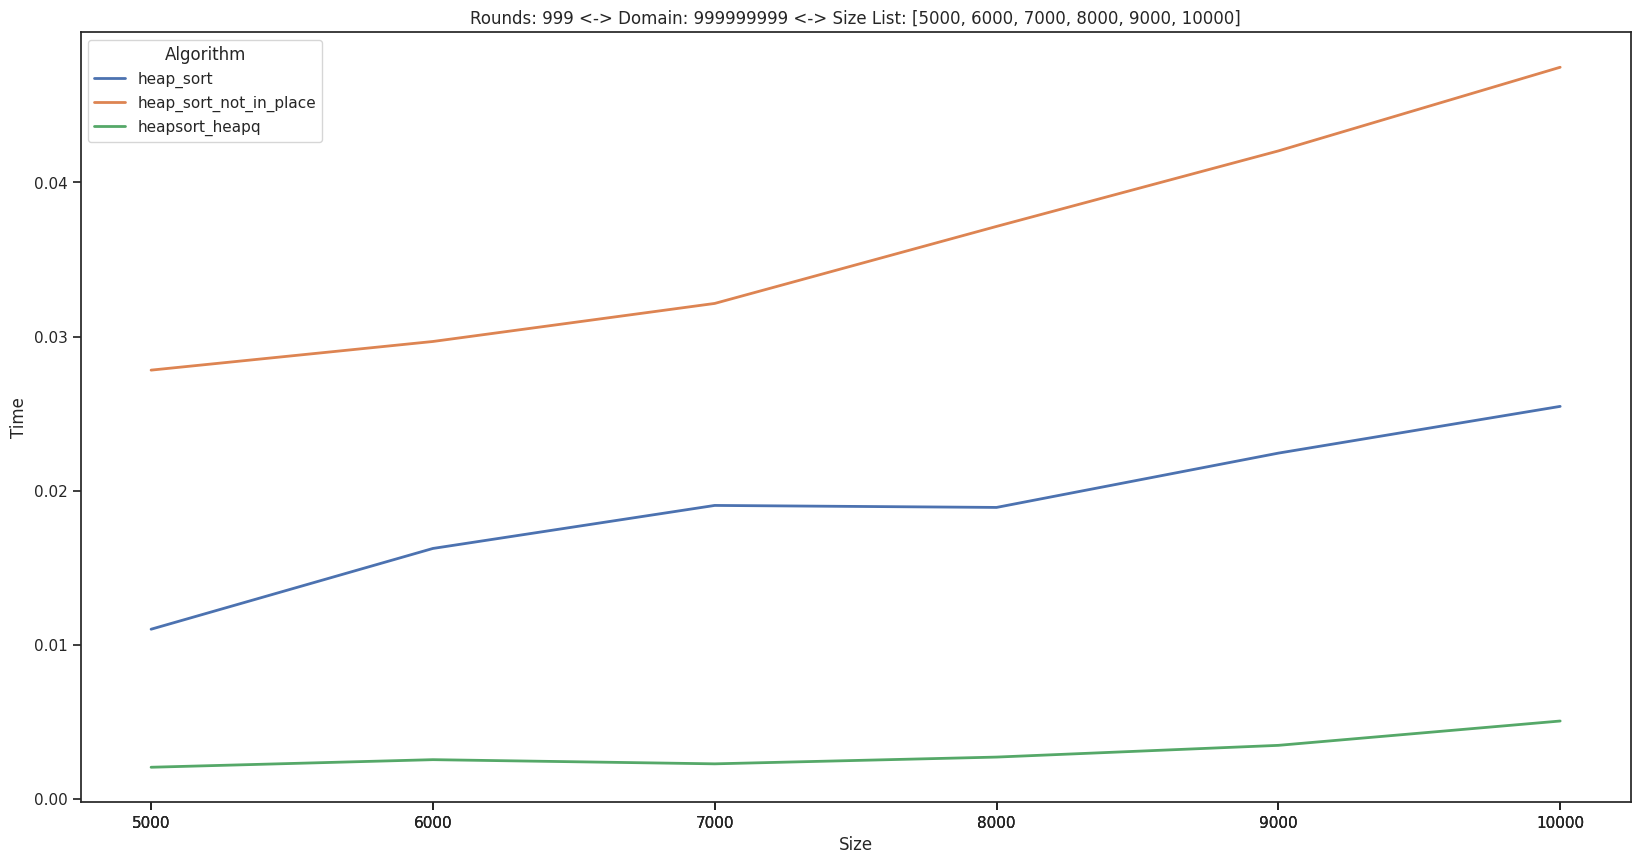

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defines font size and line width
sns.set_theme(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

fig = plt.figure()
chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)
chart.set_title(f"Rounds: {num_rounds} <-> Domain: {DOMAIN} <-> Size List: {sizes}")

chart.set(xticks=[i for i in df.Size])
plt.savefig("results.png", bbox_inches="tight")